# Importing Libraries:

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3297.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.462.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3380.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3403.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2399.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2422.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.523.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.520.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1110.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1335.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3291.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3164.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3345.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1986.jpg
/kaggle/input/cat-and-d

In [3]:
from fastai.vision import *
from fastai.metrics import accuracy

# Importing the Data:

In [4]:
data = ImageDataBunch.from_folder("../input/cat-and-dog/training_set/",
                                 ds_tfms = get_transforms(do_flip=False, flip_vert=False),
                                 valid_pct=0.2,
                                 size=224,
                                 bs=16)

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

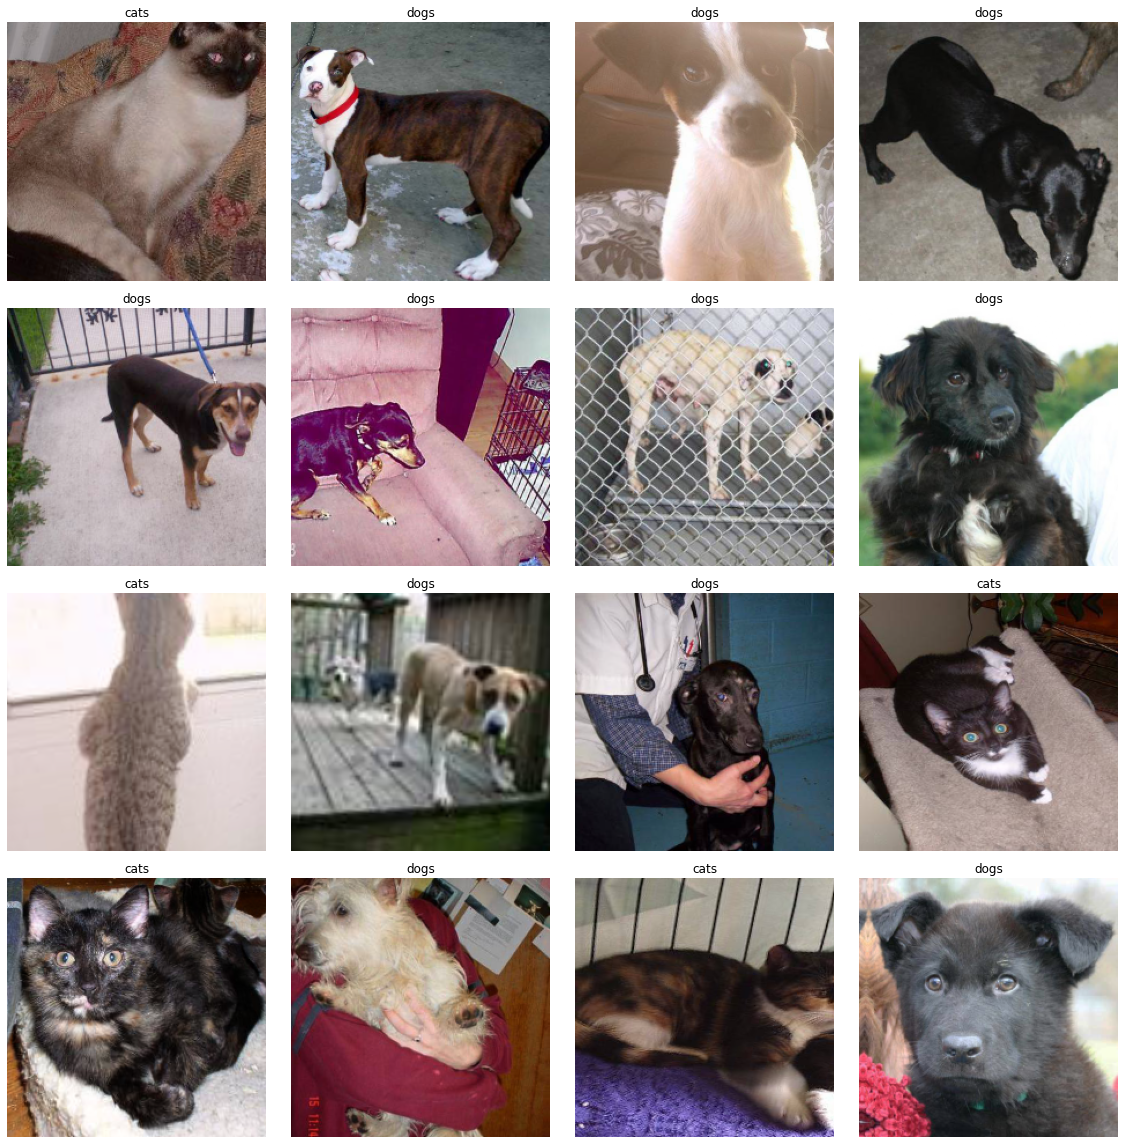

In [5]:
data.show_batch(row=3)

In [6]:
print(data.classes)

['cats', 'dogs']


# Training the Data:

In [7]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [9]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.183271,0.048245,0.981886,22:49
1,0.113794,0.023753,0.989382,22:16


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

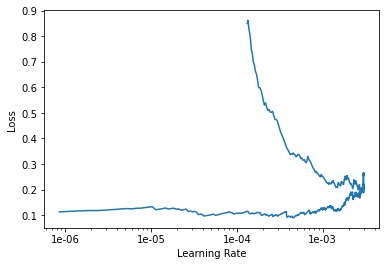

In [10]:
learn.recorder.plot()